# Amazon Fine Food Reviews Analysis

### Downloading Dataset from Kaggle

https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

1. Number of reviews: 568,454
2. Number of users: 256,059
3. Number of products: 74,258
4. Timespan: Oct 1999 - Oct 2012
5. Number of Attributes/Columns in data: 10

Objective:
Given a review, determine whether the review is positive or Critical.

We could use the Score/Rating. 
1. A rating of >=3 could be considered a positive review.
2. A review of <3 could be considered Critical. 

Attribute Information:

1.Id

2.ProductId — unique identifier for the product

3.UserId — unqiue identifier for the user

4.ProfileName

5.Helpfulness Numerator — number of users who found the review helpful

6.HelpfullnessDenominator — number of users who indicated whether they found the review helpful or not

7.Score — rating between 1 and 5

8.Time — timestamp for the review

9.Summary — brief summary of the review

10.Text — text of the review

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading dataset
df=pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
#Sorting data according to ProductId in ascending order
df.sort_values("ProductId",inplace=True)

In [5]:
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,4,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...


In [6]:
df.shape

(568454, 10)

In [7]:
#Deduplication of entries
df.duplicated(subset={"UserId","ProfileName","Time","Text"}).sum()

174521

In [8]:
# Droping the duplicate entries
df.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},inplace=True)

In [9]:
df.shape

(393933, 10)

#### We can see that only 69.25 % data is remaining after removing the duplicates, we observed that 30.75% data is duplicated in our original data.

## Exploratory Data analysis

In [10]:
# No of entries in perticular score----> max 5 rating
df["Score"].value_counts()

5    250967
4     56087
1     36307
3     29772
2     20800
Name: Score, dtype: int64

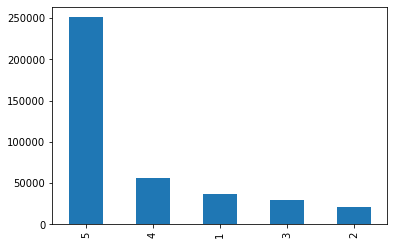

In [11]:
# Plotting the score
df["Score"].value_counts().plot(kind='bar')

#### I first looked at the distribution of ratings among all of the reviews. We see that 5-star reviews constitute a large proportion (64%) of all reviews. The next most prevalent rating is 4-stars(14%), followed by 1-star (9%), 3-star (8%), and finally 2-star reviews (5%).

In [12]:
#HelpfullnessDenominator — number of users who indicated whether they found the review helpful or not.
# percentage of people not posted the review.
df["HelpfulnessDenominator"].value_counts()[0]/df.shape[0]*100

46.86558374139765

#### Among all reviews, almost half (47%) are not voted on at all.

In [13]:
# posted reviews are helpful or not.
helpful=df[df["HelpfulnessDenominator"]!=0][["HelpfulnessNumerator","HelpfulnessDenominator"]]

In [14]:
helpful["helpful_score"]=helpful["HelpfulnessNumerator"]/helpful["HelpfulnessDenominator"]

In [15]:
def helpful_fun(x):
    if x >0.75 and x<=1:
        return ">75%"
    elif x>0.25 and x<=0.75:
        return "25%-75%"
    else:
        return "<25%"

In [16]:
helpful["helpful_score"].map(helpful_fun).value_counts()

>75%       144910
25%-75%     37348
<25%        27056
Name: helpful_score, dtype: int64

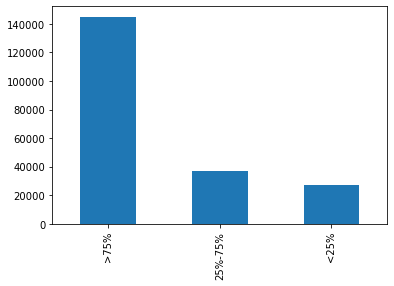

In [17]:
helpful["helpful_score"].map(helpful_fun).value_counts().plot(kind='bar')

#### I divided the reviews that were voted upon into three categories:

Helpful reviews had more than 75% of voters find the review helpful

unhelpful reviews had less than 25% of voters find the review helpful

and an intermediate group of 25-75% helpfulness.

In [18]:
# no of words count according the Score
score_group=df[["Score","Text"]] 

In [19]:
score_group["Text_count"]=score_group["Text"].map(lambda x:len(x.split()))  #---> counting the no of words in rows.

In [20]:
score_group.head()

,Score,Text,Text_count
150528,4,In June<br />I saw a charming group<br />of ro...,95
150506,4,This is a fun way for children to learn their ...,35
150505,4,"I grew up reading these Sendak books, and watc...",48
150504,4,Get the movie or sound track and sing along wi...,30
150503,4,A very entertaining rhyming story--cleaver and...,28


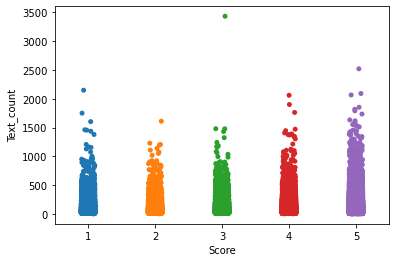

In [21]:
sns.stripplot(x='Score', y='Text_count', data=score_group)

#### The 5 score reviews are longer

In [22]:
score_group.groupby("Score").get_group(5).describe()

,Score,Text_count
count,250967.0,250967.000000
mean,5.0,73.935223
std,0.0,72.122172
min,5.0,3.000000
25%,5.0,32.000000
50%,5.0,52.000000
75%,5.0,89.000000
max,5.0,2520.000000


In [23]:
score_group.groupby("Score").get_group(4).describe()

,Score,Text_count
count,56087.0,56087.000000
mean,4.0,91.961863
std,0.0,87.545680
min,4.0,6.000000
25%,4.0,37.000000
50%,4.0,65.000000
75%,4.0,115.000000
max,4.0,2061.000000


In [24]:
score_group.groupby("Score").get_group(3).describe()

,Score,Text_count
count,29772.0,29772.000000
mean,3.0,96.206973
std,0.0,88.777131
min,3.0,7.000000
25%,3.0,41.000000
50%,3.0,70.000000
75%,3.0,122.000000
max,3.0,3432.000000


In [25]:
score_group.groupby("Score").get_group(2).describe()

,Score,Text_count
count,20800.0,20800.000000
mean,2.0,90.232885
std,0.0,81.052820
min,2.0,6.000000
25%,2.0,40.000000
50%,2.0,67.000000
75%,2.0,112.000000
max,2.0,1612.000000


In [26]:
score_group.groupby("Score").get_group(1).describe()

,Score,Text_count
count,36307.0,36307.000000
mean,1.0,82.454293
std,0.0,77.363860
min,1.0,3.000000
25%,1.0,37.000000
50%,1.0,61.000000
75%,1.0,101.000000
max,1.0,2149.000000


### Overall Conclusions:

1.Positive reviews are very common.

2.Positive reviews are shorter.

3.Longer reviews are more helpful.

4.Despite being more common and shorter, positive reviews are found more helpful.

5.Frequent reviewers are more discerning in their ratings, write longer reviews, and write more helpful reviews.

## Pre-Processing

In [27]:
# Shape of data.
df.shape

(393933, 10)

In [28]:
#User defined filter function to filter the scores-> (>=3 positive,<3 negative)
def filter(x): #---> positive-1, negative-0
    if x>=3:
        return 1
    else:
        return 0

In [29]:
df["Score"]=df["Score"].map(filter) #--> appling filter function

In [30]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150528,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,1,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
150504,150505,0006641040,A2PTSM496CF40Z,"Jason A. Teeple ""Nobody made a greater mistak...",1,1,1,1210809600,A classic,Get the movie or sound track and sing along wi...
150503,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,1,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...


In [31]:
df["Score"].value_counts() 

1    336826
0     57107
Name: Score, dtype: int64

In [32]:
df.loc[df['Score'] == 1]['Text']

150528    In June<br />I saw a charming group<br />of ro...
150506    This is a fun way for children to learn their ...
150505    I grew up reading these Sendak books, and watc...
150504    Get the movie or sound track and sing along wi...
150503    A very entertaining rhyming story--cleaver and...
                                ...                        
193171    FTS Zero is the best sweetener I have ever tri...
188388    You have to try this sauce to believe it! It s...
221794    I bought this Hazelnut Paste (Nocciola Spread)...
5702      Purchased this product at a local store in NY ...
327600    I purchased this to send to my son who's away ...
Name: Text, Length: 336826, dtype: object

In [33]:
# the value of Helpfulness Numerator is greater than HelpfullnessDenominator 
# which is not practically possible hence these two rows too are removed from calculations.
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,1,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,1,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [34]:
df.drop([64421,44736],inplace=True)

In [35]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


In [36]:
# Selecting only important columns.
df = df[["Text","Score","HelpfulnessNumerator","HelpfulnessDenominator"]]
df.head()

,Text,Score,HelpfulnessNumerator,HelpfulnessDenominator
150528,In June<br />I saw a charming group<br />of ro...,1,0,1
150506,This is a fun way for children to learn their ...,1,1,1
150505,"I grew up reading these Sendak books, and watc...",1,1,1
150504,Get the movie or sound track and sing along wi...,1,1,1
150503,A very entertaining rhyming story--cleaver and...,1,1,1


In [37]:
# installing the wordcloud for visualization
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')  #---> Creating the object

In [38]:
# Creating positive word cloud
positive_wc = wc.generate(df[df['Score'] == 1]['Text'].str.cat(sep=" "))

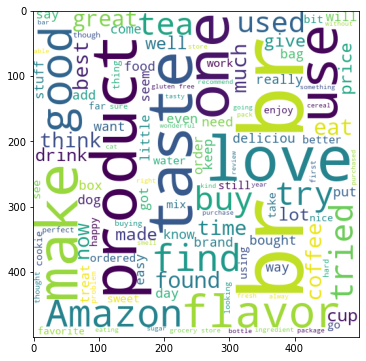

In [39]:
# Plotting the positive word cloud.
plt.figure(figsize=(15,6))
plt.imshow(positive_wc) #--->Here we can see that most frequent words in positive reviews.

In [40]:
# Creating negative word cloud
negative_wc = wc.generate(df[df['Score'] == 0]['Text'].str.cat(sep=" "))

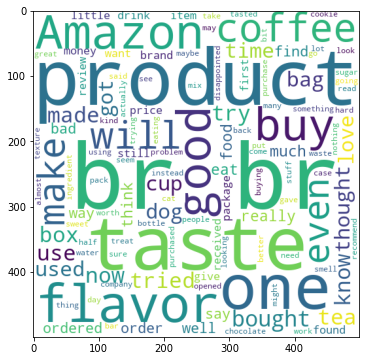

In [41]:
# Plotting negative word cloud
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)  #--->Here we can see that most frequent words in negative reviews.

In [42]:
df["Score"].value_counts()

1    336824
0     57107
Name: Score, dtype: int64

The Data is unbalanced so, we can use Upsampling

In [43]:
#Up sampling of negative(critical)

In [44]:
from sklearn.utils import resample

text_Critical__oversampled, y_Critical_oversampled,helpful_critical_num,helpful_critical_deno = resample(df['Text'].loc[df['Score'] == 0],
                                        df['Score'].loc[df['Score'] == 0],
                                        df['HelpfulnessNumerator'].loc[df['Score'] == 0],
                                        df['HelpfulnessDenominator'].loc[df['Score'] == 0],                      
                                        replace=True,
                                        n_samples=df['Text'].loc[df['Score'] == 1].shape[0],
                                        random_state=5)


critical_oversampled_df = pd.DataFrame()
critical_oversampled_df['Text'] = text_Critical__oversampled
critical_oversampled_df['Score'] =y_Critical_oversampled
critical_oversampled_df['HelpfulnessNumerator'] =helpful_critical_num
critical_oversampled_df['HelpfulnessDenominator'] =helpful_critical_deno

In [45]:
positive_df = df.loc[df['Score'] == 1]
positive_df.shape

(336824, 4)

In [46]:
critical_oversampled_df.shape

(336824, 4)

In [47]:
# concatinating positive and negative data.
balanced_final = pd.concat([positive_df,critical_oversampled_df], ignore_index=True)
balanced_final['Score'].value_counts()

1    336824
0    336824
Name: Score, dtype: int64

In [48]:
balanced_final.head() #---> Balanced dataset

,Text,Score,HelpfulnessNumerator,HelpfulnessDenominator
0,In June<br />I saw a charming group<br />of ro...,1,0,1
1,This is a fun way for children to learn their ...,1,1,1
2,"I grew up reading these Sendak books, and watc...",1,1,1
3,Get the movie or sound track and sing along wi...,1,1,1
4,A very entertaining rhyming story--cleaver and...,1,1,1


In [49]:
balanced_final.shape

(673648, 4)

In [50]:
#HelpfulnessNumerator & HelpfulnessDenominator are important only for visualization purpose but not important for sentimental analysis.
balanced_final.drop(["HelpfulnessNumerator","HelpfulnessDenominator"],inplace=True,axis=1)

In [51]:
balanced_final.shape

(673648, 2)

### Data Pre Processing

In [52]:
# import the libraries.
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
from bs4 import BeautifulSoup

In [53]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [54]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [55]:
from tqdm import tqdm
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentance in tqdm(balanced_final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|████████████████████████████████| 673648/673648 [10:34<00:00, 1062.27it/s]


In [56]:
preprocessed_reviews[1] #--->Processed review

'fun way children learn months year learn poems throughout school year like handmotions invent poem'

In [57]:
# sample data for analysis.
sample_data = balanced_final.sample(n = 5000)
sample_data.head()

,Text,Score
342874,I do like the taste of this soup as I have pur...,0
407387,This company also sells the Spectrum brand and...,0
612839,These drinks have a chalky residue in bottom o...,0
459758,The best thing about this gum is the packaging...,0
628956,This is the worst beef jerky I have ever taste...,0


In [58]:
sample_data["Score"].value_counts() #---> Data is balanced

1    2512
0    2488
Name: Score, dtype: int64

In [59]:
sample_reviews = [ preprocessed_reviews[i] for i in sample_data.index.values]
sample_reviews[0]

'like taste soup purchased past grocery store not able find saw offered amazon ordered several cases disappointment cans severly dented one actually leaking amazon immediately sent replacements sadly arrived condition not sure problem originated warehouse result poor packaging shipping reason gave one star superior customer service received amazon try item later date see corrected problem'

In [60]:
sample_data['preprocessed'] = sample_reviews
sample_data.head()

,Text,Score,preprocessed
342874,I do like the taste of this soup as I have pur...,0,like taste soup purchased past grocery store n...
407387,This company also sells the Spectrum brand and...,0,company also sells spectrum brand several bran...
612839,These drinks have a chalky residue in bottom o...,0,drinks chalky residue bottom carton spoiled dr...
459758,The best thing about this gum is the packaging...,0,best thing gum packaging begin wrong gum secon...
628956,This is the worst beef jerky I have ever taste...,0,worst beef jerky ever tasted not dried expecte...


In [61]:
sample_data.drop("Text",axis=1,inplace=True)
sample_data.head()

,Score,preprocessed
342874,0,like taste soup purchased past grocery store n...
407387,0,company also sells spectrum brand several bran...
612839,0,drinks chalky residue bottom carton spoiled dr...
459758,0,best thing gum packaging begin wrong gum secon...
628956,0,worst beef jerky ever tasted not dried expecte...


In [62]:
import nltk #---> nltk for Stemming( converting the perticular word into root word)

In [63]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()  #---> Object creation

In [64]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [65]:
sample_data["preprocessed"]=sample_data["preprocessed"].map(stem)

In [66]:
# cleaned data after pre-proccesing and stemming
sample_data.head()

,Score,preprocessed
342874,0,like tast soup purchas past groceri store not ...
407387,0,compani also sell spectrum brand sever brand w...
612839,0,drink chalki residu bottom carton spoil drink ...
459758,0,best thing gum packag begin wrong gum second s...
628956,0,worst beef jerki ever tast not dri expect mush...


In [67]:
# Splitting the data into dependent and independent features.
X = sample_data.drop(columns =['Score'])
y = sample_data['Score'].values 
print(X.shape)
print(y.shape)

(5000, 1)
(5000,)


In [68]:
# Train Test split.
from sklearn.model_selection import train_test_split

In [69]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 24)

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(4000, 1)
(4000,)
(1000, 1)
(1000,)


In [70]:
#train_X vectorization
# Here i used countvectorizer and tfidf, but tfidf gives the more accuracy
# tfidf with 5000 max features gives more accuracy

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# count_vect = CountVectorizer(stop_words="english")
tfidf = TfidfVectorizer(stop_words="english",max_features=5000)

tfidf.fit(train_X['preprocessed'])
training_data = tfidf.transform(train_X['preprocessed'])

# num_feats =train_X[['HelpfulnessNumerator' ,'HelpfulnessDenominator']].values

# from scipy import sparse

# training_data = sparse.hstack(( num_feats, final_vectors))

training_data.shape

(4000, 5000)

In [71]:
#test_X vectorization
test_data = tfidf.transform(test_X['preprocessed'].values)
test_data.shape

(1000, 5000)

In [72]:
# test_feats = test_X[['HelpfulnessNumerator' ,'HelpfulnessDenominator']].values

# test_data = sparse.hstack(( test_feats, final_test_vectors))

# test_data.shape

In [73]:
# Imorting libraries for model training and testing.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection

#### KNN

In [74]:
#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(training_data,train_y)
pred_knn = knn.predict(test_data)
acc_knn = accuracy_score(test_y, pred_knn) * float(100)
print('accuracy for k = %d is %d%%' % (5, acc_knn))
print(confusion_matrix(test_y, pred_knn))
print("precision_score",precision_score(test_y, pred_knn))

accuracy for k = 5 is 48%
[[474  10]
 [502  14]]
precision_score 0.5833333333333334


I try for various k neighbours but at k=5 accuracy is max

In [75]:
#gnb ---Gaussian Naive bayes
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(training_data.toarray(),train_y).predict(test_data.toarray())
acc_gnb = accuracy_score(test_y, y_pred_gnb) * float(100)
print('accuracy for Gaussian Naive bayes is %d%%' % (acc_gnb))
print(confusion_matrix(test_y, y_pred_gnb))
print("precision_score",precision_score(test_y, y_pred_gnb))

accuracy for Gaussian Naive bayes is 64%
[[264 220]
 [135 381]]
precision_score 0.6339434276206323


In [76]:
#mnb ---Multinomial Naive bayes
mnb = MultinomialNB()
y_pred_mnb = mnb.fit(training_data.toarray(),train_y).predict(test_data.toarray())
acc_mnb = accuracy_score(test_y, y_pred_mnb) * float(100)
print('accuracy for Multinomial Naive bayes is %d%%' % (acc_mnb))
print(confusion_matrix(test_y, y_pred_mnb))
print("precision_score",precision_score(test_y, y_pred_mnb))

accuracy for Multinomial Naive bayes is 81%
[[372 112]
 [ 77 439]]
precision_score 0.7967332123411979


In [77]:
#bnb ---Bernoulli Naive bayes
bnb = BernoulliNB()
y_pred_bnb = bnb.fit(training_data.toarray(),train_y).predict(test_data.toarray())
acc_bnb = accuracy_score(test_y, y_pred_bnb) * float(100)
print('accuracy for Bernoulli Naive bayes is %d%%' % (acc_bnb))
print(confusion_matrix(test_y, y_pred_bnb))
print("precision_score",precision_score(test_y, y_pred_bnb))

accuracy for Bernoulli Naive bayes is 83%
[[377 107]
 [ 63 453]]
precision_score 0.8089285714285714


In [78]:
# import all the classification algorithms.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
# Creating the objects
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [80]:
# Creating the dictionary for all the objects.
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [81]:
# Creating the user defined fuction for training and testing.
def train_classifier(clf,training_data,train_y,test_data,test_y):
    clf.fit(training_data,train_y)
    y_pred = clf.predict(test_data)
    accuracy = accuracy_score(test_y,y_pred)
    precision = precision_score(test_y,y_pred)
    
    return accuracy,precision

In [82]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,training_data,train_y,test_data,test_y)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.791
Precision -  0.7858472998137802
For  KN
Accuracy -  0.487
Precision -  0.5714285714285714
For  DT
Accuracy -  0.639
Precision -  0.7341389728096677
For  LR
Accuracy -  0.786
Precision -  0.7859848484848485
For  RF
Accuracy -  0.788
Precision -  0.7900763358778626
For  AdaBoost
Accuracy -  0.746
Precision -  0.7599206349206349
For  BgC
Accuracy -  0.745
Precision -  0.7485714285714286
For  ETC
Accuracy -  0.812
Precision -  0.809433962264151
For  GBDT
Accuracy -  0.725
Precision -  0.7636761487964989


In [83]:
clfs.keys()

dict_keys(['SVC', 'KN', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBDT'])

In [84]:
# creating dataframe for precision and accuracy visualization.
performance_df = pd.DataFrame({'Algorithm':list(clfs.keys()),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [85]:
performance_df

,Algorithm,Accuracy,Precision
7,ETC,0.812,0.809434
4,RF,0.788,0.790076
3,LR,0.786,0.785985
0,SVC,0.791,0.785847
8,GBDT,0.725,0.763676
5,AdaBoost,0.746,0.759921
6,BgC,0.745,0.748571
2,DT,0.639,0.734139
1,KN,0.487,0.571429


Only SVC,LOR,ETC,BNB are the best performing models.

In [87]:
# Hyperparameter Tuning of SVC
from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['rbf', 'sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(training_data,train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.581 total time=   7.7s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.584 total time=   4.5s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.583 total time=   4.2s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.571 total time=   4.3s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.575 total time=   4.2s
[CV 1/5] END .............C=0.1, kernel=sigmoid;, score=0.780 total time=   4.9s
[CV 2/5] END .............C=0.1, kernel=sigmoid;, score=0.804 total time=   4.4s
[CV 3/5] END .............C=0.1, kernel=sigmoid;, score=0.807 total time=   4.0s
[CV 4/5] END .............C=0.1, kernel=sigmoid;, score=0.801 total time=   4.0s
[CV 5/5] END .............C=0.1, kernel=sigmoid;, score=0.818 total time=   4.0s
[CV 1/5] END ...................C=1, kernel=rbf;, score=0.796 total time=   4.0s
[CV 2/5] END ...................C=1, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [88]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [90]:
# Hyperparameter Tuning of Logistic Regression
from sklearn.model_selection import GridSearchCV

  
# defining parameter range
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'solver' : ['lbfgs','liblinear'],
    'max_iter' : [100, 1000]
    }
]
  
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(training_data,train_y)
grid.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END max_iter=100, penalty=l1, solver=liblinear;, score=0.779 total time=   0.0s
[CV 2/5] END max_iter=100, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 3/5] END max_iter=100, penalty=l1, solver=liblinear;, score=0.792 total time=   0.0s
[CV 4/5] END max_iter=100, penalty=l1, solver=liblinear;, score=0.789 total time=   0.0s
[CV 5/5] END max_iter=100, penalty=l1, solver=liblinear;, score=0.811 total time=   0.0s
[CV 1/5] END max_iter=100, penalty=l2, solver=lbfgs;, score=0.791 total time=   

{'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [91]:
# Hyperparameter Tuning of Extratrees Classifier
from sklearn.model_selection import GridSearchCV

  
# defining parameter range
param_grid = [    
    {'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [8, 89, None]
    }
]
  
grid = GridSearchCV(ExtraTreesClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(training_data,train_y)
grid.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=50;, score=0.767 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=8, n_estimators=50;, score=0.770 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=8, n_estimators=50;, score=0.776 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=50;, score=0.772 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=50;, score=0.744 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.774 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.784 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.792 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.776 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=8, n_estimators=100;, score=0.769 total time=   1.3s
[CV 1/5] END criterion=g

{'criterion': 'gini', 'max_depth': 89, 'n_estimators': 100}

In [93]:
# Creating Voting Classifier o best performing models.
svc = SVC(kernel='rbf',C=1, gamma=1.0,probability=True)
lrc = LogisticRegression(solver='liblinear', penalty='l2',max_iter=100)
etc = ExtraTreesClassifier(criterion='gini',max_depth=89,n_estimators=100)
bnb = BernoulliNB()

from sklearn.ensemble import VotingClassifier

In [94]:
voting = VotingClassifier(estimators=[('svc', svc),('lrc', lrc), ('etc', etc), ('bnb',bnb)],voting='soft')

In [95]:
# train the model
voting.fit(training_data,train_y)

VotingClassifier(estimators=[('svc', SVC(C=1, gamma=1.0, probability=True)),
                             ('lrc', LogisticRegression(solver='liblinear')),
                             ('etc', ExtraTreesClassifier(max_depth=89)),
                             ('bnb', BernoulliNB())],
                 voting='soft')

In [96]:
# Prediction by model
y_pred = voting.predict(test_data)
print("Accuracy",accuracy_score(test_y, y_pred))
print("Precision",precision_score(test_y, y_pred))

Accuracy 0.825
Precision 0.8128440366972477


In [97]:
# pickle the data
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))